Bubble Sort - Tamanho 1000: 0.0817 segundos
Insertion Sort - Tamanho 1000: 0.0213 segundos
Selection Sort - Tamanho 1000: 0.0225 segundos
Merge Sort - Tamanho 1000: 0.0017 segundos
Quick Sort - Tamanho 1000: 0.0011 segundos
Counting Sort - Tamanho 1000: 0.0002 segundos
Radix Sort - Tamanho 1000: 0.0007 segundos
Bucket Sort - Tamanho 1000: 0.0141 segundos
Shell Sort - Tamanho 1000: 0.0015 segundos
Heap Sort - Tamanho 1000: 0.0024 segundos
Bubble Sort - Tamanho 3000: 0.7683 segundos
Insertion Sort - Tamanho 3000: 0.1904 segundos
Selection Sort - Tamanho 3000: 0.2095 segundos
Merge Sort - Tamanho 3000: 0.0059 segundos
Quick Sort - Tamanho 3000: 0.0039 segundos
Counting Sort - Tamanho 3000: 0.0008 segundos
Radix Sort - Tamanho 3000: 0.0028 segundos
Bucket Sort - Tamanho 3000: 0.1234 segundos
Shell Sort - Tamanho 3000: 0.0058 segundos
Heap Sort - Tamanho 3000: 0.0085 segundos
Bubble Sort - Tamanho 6000: 3.1287 segundos
Insertion Sort - Tamanho 6000: 0.8190 segundos
Selection Sort - Tamanho 

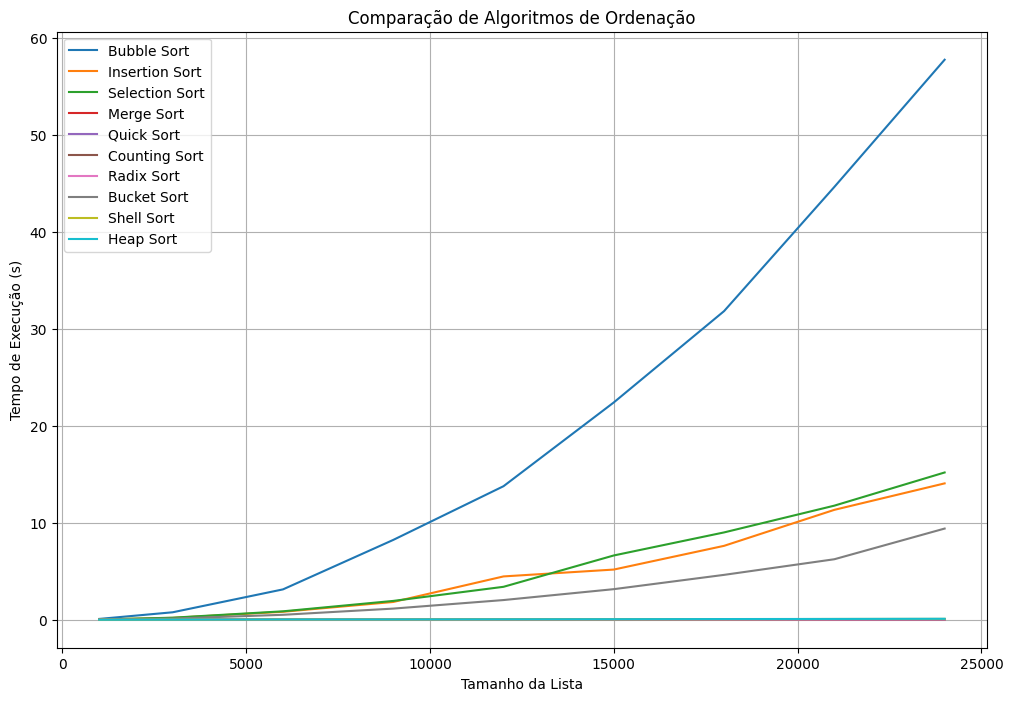

In [ ]:
import matplotlib.pyplot as plt
import random
import timeit

#MÉTODO DA BOLHA
#Algoritmo mais estável
#Ordenação baseado em comparação (troca)
def bubbleSort(lista):
  for i in range(len(lista)):
    for j in range(len(lista) - 1):
      if lista[j] > lista[j + 1]:
        lista[j], lista[j + 1] = lista[j + 1], lista[j]

#INSERTION SORT
#Ordenação baseado em comparação (insere e mantem ordenado)
def insertionSort(lista):
  for i in range(1, len(lista)):
    chave = lista[i]
    j = i - 1
    while j >= 0 and lista[j] > chave:
      lista[j + 1] = lista[j]
      j -= 1
      lista[j +1] = chave

#SELECTION SORT
#Ordenação baseado em comparação (filas de prioridade)
def selectionSort(lista):
  for i in range(len(lista)):
    min_idx = i
    for j in range(i + 1, len(lista)):
      if lista[j] < lista[min_idx]:
        min_idx = j
    lista[i], lista[min_idx] = lista[min_idx], lista[i]

#MERGE SORT
#Ordenação baseado em comparação (divisão e conquista)
def mergeSort(lista):
  if len(lista) > 1:
    meio = len(lista) //2
    L = lista[:meio]
    R = lista[meio:]
    mergeSort(L)
    mergeSort(R)
    i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                lista[k] = L[i]
                i += 1
            else:
                lista[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            lista[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            lista[k] = R[j]
            j += 1
            k += 1

#QUICK SORT
#Ordenação baseado em comparação (divisão e conquista)

def quickSort(lista):
    def _quickSort(arr, low, high):
        if low < high:
            pi = partition(arr, low, high)
            _quickSort(arr, low, pi - 1)
            _quickSort(arr, pi + 1, high)

    def partition(arr, low, high):
        pivot = arr[high]
        i = low - 1
        for j in range(low, high):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i+1], arr[high] = arr[high], arr[i+1]
        return i + 1

    _quickSort(lista, 0, len(lista) - 1)

#COUNTING SORT
def countingSort(lista):
    max_val = max(lista)
    m = max_val + 1
    count = [0] * m
    for a in lista:
        count[a] += 1
    i = 0
    for a in range(m):
        for c in range(count[a]):
            lista[i] = a
            i += 1

#RADIX SORT
#Ordenação baseado em endereço
def radixSort(lista):
    RADIX = 10
    placement = 1
    max_digit = max(lista)

    while placement <= max_digit:
        buckets = [[] for _ in range(RADIX)]
        for i in lista:
            tmp = int((i / placement) % RADIX)
            buckets[tmp].append(i)
        a = 0
        for b in range(RADIX):
            for i in buckets[b]:
                lista[a] = i
                a += 1
        placement *= RADIX

#BUCKET SORT
def bucketSort(lista):
    if len(lista) == 0:
        return
    bucket = [[] for _ in range(10)]
    for num in lista:
        index = int(10 * num / (max(lista) + 1))
        bucket[index].append(num)
    for i in range(10):
        bucket[i] = sorted(bucket[i])
    k = 0
    for i in range(10):
        for j in range(len(bucket[i])):
            lista[k] = bucket[i][j]
            k += 1

#SHELL SORT
#Ordenação baseado em comparação, por incremento decrescente
def shellSort(lista):
    n = len(lista)
    gap = n // 2
    while gap > 0:
        for i in range(gap, n):
            temp = lista[i]
            j = i
            while j >= gap and lista[j - gap] > temp:
                lista[j] = lista[j - gap]
                j -= gap
            lista[j] = temp
        gap //= 2

#HEAP SORT
#Ordenação baseado em comparação, por fila de prioridade
def heapSort(lista):
  def heapify(arr, n, i):
        largest = i
        l = 2 * i + 1
        r = 2 * i + 2
        if l < n and arr[i] < arr[l]:
            largest = l
        if r < n and arr[largest] < arr[r]:
            largest = r
        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            heapify(arr, n, largest)

    n = len(lista)
    for i in range(n // 2 - 1, -1, -1):
        heapify(lista, n, i)
    for i in range(n - 1, 0, -1):
        lista[i], lista[0] = lista[0], lista[i]
        heapify(lista, i, 0)

#Gera lista
def geraLista(tam):
    return [random.randint(1, tam) for _ in range(tam)]

#Lista de tamanhos
tamanhos = [1000, 3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000]

#Algoritmos
algoritmos = {
    "Bubble Sort": bubbleSort,
    "Insertion Sort": insertionSort,
    "Selection Sort": selectionSort,
    "Merge Sort": mergeSort,
    "Quick Sort": quickSort,
    "Counting Sort": countingSort,
    "Radix Sort": radixSort,
    "Bucket Sort": bucketSort,
    "Shell Sort": shellSort,
    "Heap Sort": heapSort,
}

#Avaliação dos tempos
tempos = {nome: [] for nome in algoritmos}

for tamanho in tamanhos:
    lista_base = geraLista(tamanho)
    for nome, func in algoritmos.items():
        lista_teste = list(lista_base)
        tempo = timeit.timeit(lambda: func(lista_teste), number=1)
        tempos[nome].append(tempo)
        print(f"{nome} - Tamanho {tamanho}: {tempo:.4f} segundos")

#Gráfico
fig, ax = plt.subplots(figsize=(12, 8))
for nome, tempo in tempos.items():
    ax.plot(tamanhos, tempo, label=nome)

ax.set_title("Comparação de Algoritmos de Ordenação")
ax.set_xlabel("Tamanho da Lista")
ax.set_ylabel("Tempo de Execução (s)")
ax.legend()
ax.grid(True)
plt.show()

